In [1]:
# Import packages and settings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px

import os, sys
dir1 = os.path.dirname(os.path.abspath(''))
if not dir1 in sys.path: sys.path.append(dir1)
import preprocessing.data_format as data_format
import preprocessing.data_cleaning as data_cleaning
import preprocessing.data_imputation as data_imputation
import plotly.graph_objects as go
from IPython.display import display
pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
dt_resolution = dt.timedelta(minutes=60)
dt_start = dt.datetime(day=1, month=3, year=2003)
dt_end = dt.datetime(day=1, month=1, year=2018) #exclusive last day
dt_ref = pd.date_range(start=dt_start, end=dt_end, freq=str(dt_resolution.seconds) + "S", inclusive="left")

utilities = ["CT", "ME", "NH", "RI", "VT", "NEMASSBOST", "SEMASS", "WCMASS"] # Note that sheet names of 2016_smd_hourly.xls and 2017_smd_hourly.xls were adapted to match the others!
site_id = "GFC17_load"
base_url = f'../data/{site_id}'
timestamp_format = "%Y-%m-%d-%H"

data = []
for year in range(2003, 2018):
    
    # Prepare read-in
    ending = 'xlsx' if year == 2017 else 'xls'
    hour_column = "Hr_End" if year in [2016, 2017] else "Hour"
    demand_column = "RT_Demand" if year in [2016, 2017] else "DEMAND"
    temperature_column = "Dry_Bulb" if year in [2016, 2017] else "DryBulb"
    
    data_temp = {}
    for utility in utilities:
        # Read sheet
        data_temp[utility] = pd.read_excel(f'{base_url}/{year}_smd_hourly.{ending}', sheet_name=utility, usecols=["Date", hour_column, demand_column, temperature_column])
        
        # Convert hour to [0, 23] format
        data_temp[utility][hour_column] = data_temp[utility][hour_column].sub(1)
        
        # Join datetime columns into one
        data_temp[utility]["datetime"] = data_temp[utility][["Date", hour_column]].astype(str).apply(lambda x: x.str.zfill(2)).agg('-'.join, axis=1)
        data_temp[utility]["datetime"] = pd.to_datetime(data_temp[utility]["datetime"], format="%Y-%m-%d-%H")
        data_temp[utility] = data_temp[utility].drop(columns=["Date", hour_column])
        
        # Set index and rename columns
        data_temp[utility] = data_temp[utility].set_index("datetime")
        data_temp[utility] = data_temp[utility].rename(columns={demand_column: "load", temperature_column: "airTemperature"})
        
    # Merge utilities per year
    data.append(pd.concat(data_temp, axis=1))

# Concatenate along time
data = pd.concat(data)

# Print statistics
print(f"Missing values: {data.isna().sum().sum()}")
print(f"Missing datetimes: {dt_ref.difference(data.index.to_series())}")

# Set resolution
data.index.freq = f"{dt_resolution.seconds}S"

Try 2003
NaN's: 0
Try 2004
NaN's: 0
Try 2005
NaN's: 0
Try 2006
NaN's: 0
Try 2007
NaN's: 0
Try 2008
NaN's: 0
Try 2009
NaN's: 0
Try 2010
NaN's: 0
Try 2011
NaN's: 0
Try 2012
NaN's: 0
Try 2013
NaN's: 0
Try 2014
NaN's: 0
Try 2015
NaN's: 0
Try 2016
NaN's: 0
Try 2017
NaN's: 0


In [14]:
# Take two years of data
data_to_save = data.loc["2016-01-01 00:00:00":]

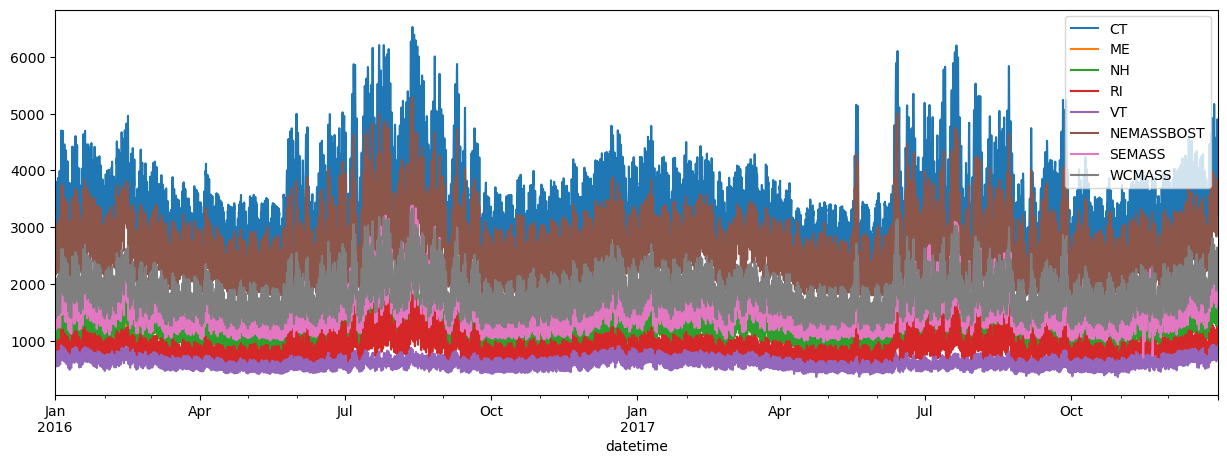

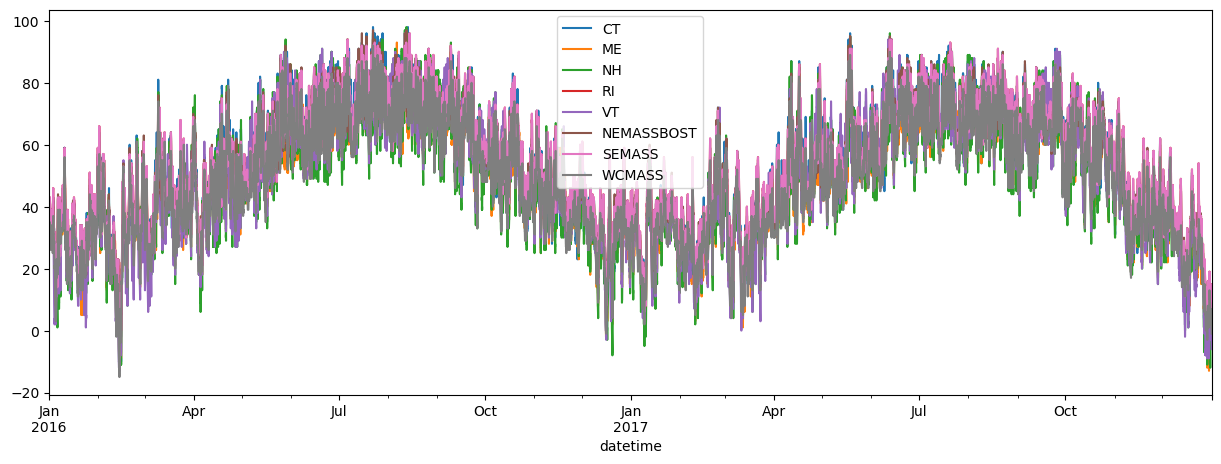

In [15]:
# Plot data
data_to_save = data_to_save.swaplevel(axis=1)
for col in ["load", "airTemperature"]:
    data_to_save[col].plot()
    plt.show()
data_to_save = data_to_save.swaplevel(axis=1)

In [17]:
# Save dataframe
save_flag = True
nans = data.isna().sum().sum()
if nans==0 and save_flag:
    data.to_pickle(f"{base_url}/load_with_weather.pkl")
    print("Saved!")

Saved!
